In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
import pandas as pd
import os

In [83]:
#load in qiime2 data
microb_prof_path = os.path.join(os.getcwd(), "qiime2_microbiome_profiles")
subs = os.listdir(microb_prof_path)
subs = filter(lambda f: f.endswith('.csv'), subs)
prof_dfs = []

#load in qiime2 metadata
metadata_df = pd.read_csv(os.path.join(os.getcwd(),"DataFrame_2_Pruned.tsv"), sep='\t', engine='python')

for sub in subs:
    sub_num = sub[:-12]
    profile_df = pd.read_csv(os.path.join(microb_prof_path, sub), engine='python')
    profile_df.index = profile_df['Taxon']
    profile_df = profile_df.T
    profile_df = profile_df.drop(profile_df.index[0])
    profile_df.rename(columns={'Taxon': 'Run'}, inplace=True)
    
    pruned_metadata = metadata_df[metadata_df['Submission'] == sub_num]
    profile_df = pd.merge(profile_df, pruned_metadata['Disease_condition'], left_on='Run', right_on='Run', how='left')
    profile_df = pd.merge(profile_df, pruned_metadata['Description'], left_on='Run', right_on='Run', how='left')
    
    prof_dfs.append(profile_df)
    

KeyError: 'Run'

In [73]:
display(prof_dfs[0].head())

Taxon,Unassigned,k__Bacteria,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Brevibacteriaceae; g__Brevibacterium; s__paucivorans,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Corynebacteriaceae; g__Corynebacterium,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Propionibacteriaceae; g__Propionibacterium,k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Streptococcaceae; g__Streptococcus,k__Bacteria; p__OD1,k__Bacteria; p__OD1; c__; o__; f__; g__; s__,k__Bacteria; p__Proteobacteria,k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales,k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__mitochondria,k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__mitochondria; g__; s__,k__Bacteria; p__Proteobacteria; c__Deltaproteobacteria; o__Bdellovibrionales; f__Bdellovibrionaceae; g__Bdellovibrio; s__bacteriovorus,k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria
SRR4384539,0,1,0,0,0,0,0,0,0,0,0,0,0,0
SRR4384540,0,0,0,0,0,0,0,0,0,0,0,1,0,0
SRR4384541,0,1,0,0,0,0,0,0,0,0,0,0,0,0
SRR4384543,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SRR4384544,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
#add in extra values for species
all_species = set()

for df in prof_dfs:
    all_species.update(df['Taxon'])
    
for df in prof_dfs:
    existing_species = set(df['Taxon'])
    missing_species = all_species - existing_species
    new_rows = pd.DataFrame(0, index=range(len(missing_species)), columns=df.columns)
    new_rows['Taxon'] = list(missing_species)
    df = pd.concat([df, new_rows], ignore_index=True)
    df = df.sort_values(by='Taxon')

#TEST (remove later)
for i in prof_dfs:
    print(len(i))
    
    
#concatinate all dfs   #TODOy
full_df = prof_dfs.pop()
for df in prof_dfs:
    pd.merge(full_df, df, left_on='Feature ID', right_on='Feature ID', how='inner')

14


In [37]:
#prep_data
all_taxa = full_df['Taxon'].values
no_taxon_df = full_df.drop('Taxon', axis=1)
all_samples = no_taxon_df.columns 
all_subs_np = no_taxon_df.values.T

print(all_subs_np.shape)
print(all_subs_np)

(148, 14)
[[0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.33333333 0.         ... 0.66666667 0.         0.        ]
 [0.         0.28571429 0.         ... 0.         0.         0.71428571]
 [0.         1.         0.         ... 0.         0.         0.        ]]


In [38]:
pca = PCA(n_components=4)
pca.fit(all_subs_np)
profile_pca = pca.transform(all_subs_np)

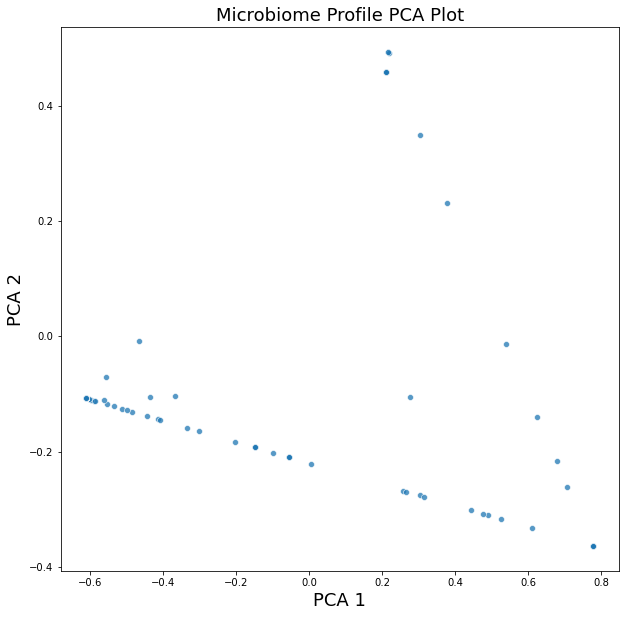

In [49]:
plt.figure(figsize=(10,10))

pca_plot = sns.scatterplot(
    x=profile_pca[:,0], y=profile_pca[:,1],
    #hue=y,
    #palette=sns.color_palette("hls", 10),
    #legend="full",
    alpha=0.75)

pca_plot.set_xlabel('PCA 1', fontsize=18)
pca_plot.set_ylabel('PCA 2', fontsize=18)
pca_plot.set_title("Microbiome Profile PCA Plot", fontsize=18)

plt.show()

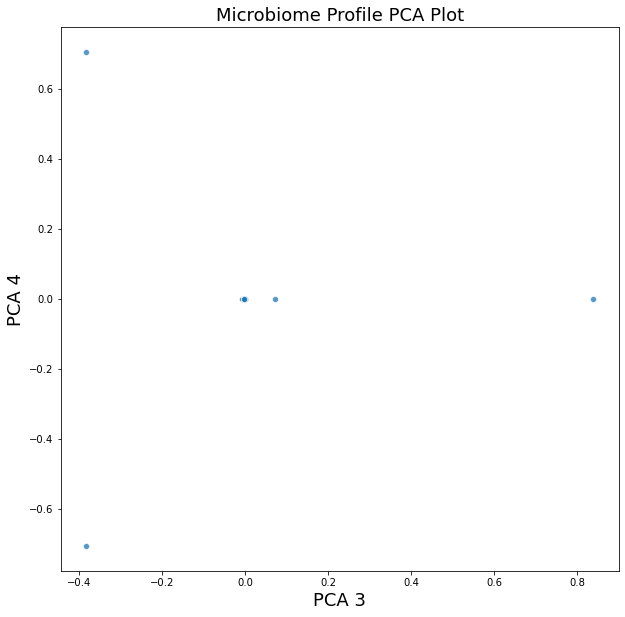

In [48]:
plt.figure(figsize=(10,10))

pca_plot = sns.scatterplot(
    x=profile_pca[:,2], y=profile_pca[:,3],
    #hue=y,
    #palette=sns.color_palette("hls", 10),
    #legend="full",
    alpha=0.75)

pca_plot.set_xlabel('PCA 3', fontsize=18)
pca_plot.set_ylabel('PCA 4', fontsize=18)
pca_plot.set_title("Microbiome Profile PCA Plot", fontsize=18)

plt.show()

In [44]:
#generate tSNE graphs
tsne = TSNE(n_components=2)
profile_tsne = tsne.fit_transform(all_subs_np)

Text(0.5, 1.0, 'Microbiome Profile tSNE Plot')

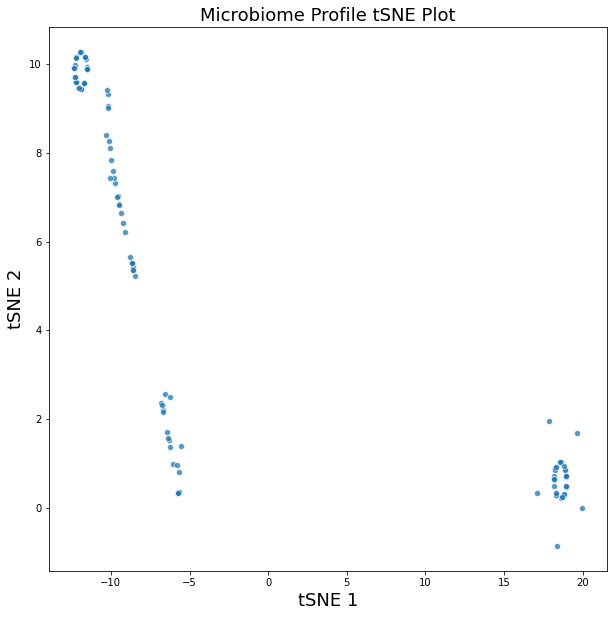

In [50]:
plt.figure(figsize=(10,10))

pca_plot = sns.scatterplot(
    x=profile_tsne[:,0], y=profile_tsne[:,1],
    #hue=y,
    #palette=sns.color_palette("hls", 10),
    #legend="full",
    alpha=0.75)

pca_plot.set_xlabel('tSNE 1', fontsize=18)
pca_plot.set_ylabel('tSNE 2', fontsize=18)
pca_plot.set_title("Microbiome Profile tSNE Plot", fontsize=18)